## Widths of longer canyon (Astoria-like)

In [2]:
#import gsw as sw # Gibbs seawater package

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.gridspec as gspec
%matplotlib inline
from matplotlib.ticker import FormatStrFormatter
from netCDF4 import Dataset
import numpy as np
import os
import pandas as pd
import seaborn as sns
import sys
import scipy.stats
import warnings
warnings.filterwarnings("ignore")
import xarray as xr

import canyon_tools.readout_tools as rout 
import canyon_tools.metrics_tools as mpt

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [4]:
sns.set_context('talk')
sns.set_style('white')

In [5]:
CanyonGrid='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)

CanyonState='/data/kramosmu/results/TracerExperiments/LONGER_CNY/run01/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonGridLon2='/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/gridGlob.nc'
CanyonGridLon2Out = Dataset(CanyonGridLon2)

CanyonStateLon2='/data/kramosmu/results/TracerExperiments/LONGER_CNY2/run01/stateGlob.nc'
CanyonStateLon2Out = Dataset(CanyonStateLon2)

CanyonGridNarr='/data/kramosmu/results/TracerExperiments/NARROW_CNY/run01/gridGlob.nc'
CanyonGridNarrOut = Dataset(CanyonGridNarr)

CanyonStateNarr='/data/kramosmu/results/TracerExperiments/NARROW_CNY/run01/stateGlob.nc'
CanyonStateNarrOut = Dataset(CanyonStateNarr)


# Grid variables
nx = 616
ny = 360
nz = 90
nt = 19 # t dimension size 
time = CanyonStateOut.variables['T']

In [6]:
sb_ind = 29

depth = CanyonGridOut.variables['Depth'][:]
Y = CanyonGridOut.variables['Y'][:]
X = CanyonGridOut.variables['X'][:]
RC = CanyonGridOut.variables['RC'][:]
hFacC = CanyonGridOut.variables['HFacC'][:]

In [7]:
depthLon2 = CanyonGridLon2Out.variables['Depth'][:]
YLon2 = CanyonGridLon2Out.variables['Y'][:]
XLon2 = CanyonGridLon2Out.variables['X'][:]
RCLon2 = CanyonGridLon2Out.variables['RC'][:]
hFacCLon2 = CanyonGridLon2Out.variables['HFacC'][:]

In [8]:
depthNarr = CanyonGridNarrOut.variables['Depth'][:]
YNarr = CanyonGridNarrOut.variables['Y'][:]
XNarr = CanyonGridNarrOut.variables['X'][:]
RCNarr = CanyonGridNarrOut.variables['RC'][:]
hFacCNarr = CanyonGridNarrOut.variables['HFacC'][:]

### LONGER_CNY

shelf break depth is 149.8 m
head depth is 48.3 m
rim depth at station UwH is 69.1 m
rim depth at mid length is 106.8 m
Big L is 16592.9 m
L is 12933.6 m
slope = (-149.82 + 97.46) / (51333.64 - 59888.45) = 0.01


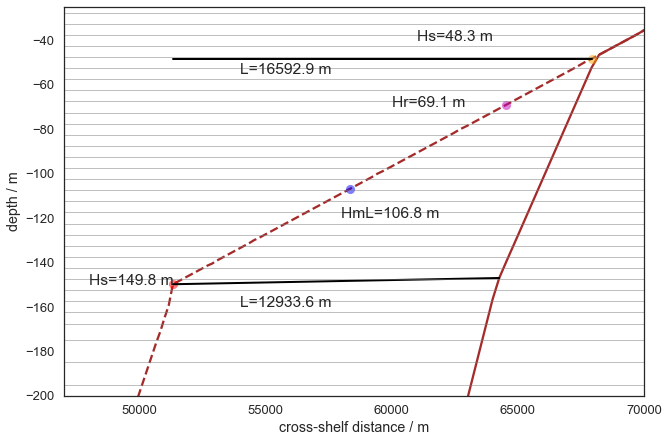

In [9]:
fig, ax = plt.subplots(1,1)

# plot canyon axis and shelf
ax.plot(Y,-depth[:,300], color='brown', linestyle='--')
ax.plot(Y,-depth[:,180], color='brown')

# Shelf break depth
ax.plot(Y[225],-depth[225,300],'ro', alpha=0.5)
print('shelf break depth is %1.1f m' %depth[225,300])
ax.text(48000,-150,'Hs=%1.1f m' %(depth[225,300]))

# Head depth
ax.plot(Y[300],-depth[300,300],'o', color='orange', alpha=0.5)
print('head depth is %1.1f m' %depth[300,300])
ax.text(61000,-40,'Hs=%1.1f m' %(depth[300,300]))

# rim depth at UwH
ax.plot(Y[288],-depth[288,300],'mo', alpha=0.5)
print('rim depth at station UwH is %1.1f m' %depth[288,300])
ax.text(60000,-70,'Hr=%1.1f m' %(depth[288,300]))

# mid length depth
ax.plot(Y[262],-depth[262,300],'bo', alpha=0.5)
print('rim depth at mid length is %1.1f m' %depth[262,300])
ax.text(58000,-120,'HmL=%1.1f m' %(depth[262,300]))

# L
plt.plot([Y[300],Y[225]],[-depth[300,300],-depth[300,300]], linewidth=2, color='k')
print('Big L is %1.1f m' %(Y[300]-Y[225]))
ax.text(54000,-55,'L=%1.1f m' %(Y[300]-Y[225]))

# Short L
plt.plot([Y[287],Y[225]],[-depth[287,180],-depth[225,300]], linewidth=2, color='k')
print('L is %1.1f m' %(Y[287]-Y[225]))
ax.text(54000,-160,'L=%1.1f m' %(Y[287]-Y[225]))

# depth levels
for zz in range(len(RC)):
    ax.axhline(RC[zz], color='0.5', linewidth=0.5)

ax.set_ylim(-200,-25)
ax.set_xlim(47000,70000)

ax.set_ylabel('depth / m')
ax.set_xlabel('cross-shelf distance / m')

slope = (-depth[225,400]+depth[269,400])/(Y[225]-Y[269])
print('slope = (%1.2f + %1.2f) / (%1.2f - %1.2f) = %1.2f' %(-depth[225,400],depth[269,400],Y[225],Y[269], slope) )

Width at rim depth at mid length is 22044.8 m
Width at sb depth at mid length is 12310.3 m
Width at sb depth at mouth is 28079.4 m
L is 16592.9 m


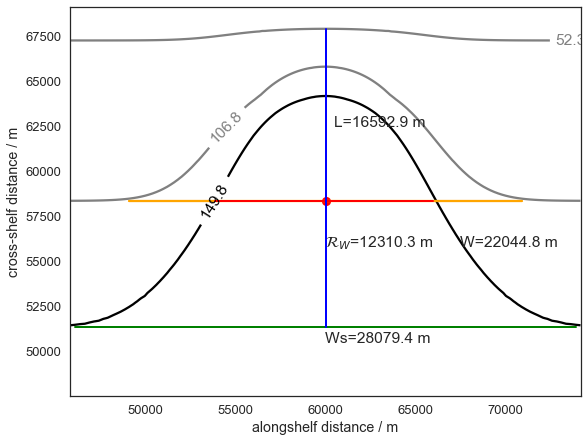

In [10]:
fig, ax = plt.subplots(1,1)

CS = ax.contour(X[100:260],Y[200:305],depth[200:305,100:260], levels=[depth[300,180], depth[262,300] , 149.8], colors=['0.5','0.5','k'])
ax.clabel(CS, fmt='%1.1f')
ax.plot(X[180],Y[262],'or')

ax.plot(X[113:247],np.ones(len(X[113:247]))*Y[262],'-', color='orange')
print('Width at rim depth at mid length is %1.1f m' %(-X[113]+X[247]))
ax.text(67500,55800,'W=%1.1f m' %(-X[113]+X[247]))

ax.plot(X[137:222],np.ones(len(X[137:222]))*Y[262],'-r', linewidth=2)
print('Width at sb depth at mid length is %1.1f m' %(-X[137]+X[222]))
ax.text(60000,55800,r'$\mathcal{R}_W$=%1.1f m' %(-X[137]+X[222]))

ax.plot(X[101:259],np.ones(len(X[101:259]))*Y[225],'-g', linewidth=2)
print('Width at sb depth at mouth is %1.1f m' %(-X[101]+X[259]))
ax.text(60000,50500,'Ws=%1.1f m' %(-X[101]+X[259]))

ax.plot(np.ones(len(Y[225:301]))*X[180], Y[225:301],'-b', linewidth=2)
print('L is %1.1f m' %(Y[300]-Y[225]))
ax.text(60500,62500,'L=%1.1f m' %(Y[300]-Y[225]))

ax.set_xlabel('alongshelf distance / m')
ax.set_ylabel('cross-shelf distance / m')

ax.set_aspect(1)

### LONGER_CNY2

shelf break depthLon2 is 149.8 m
head depthLon2 is 73.9 m
rim depthLon2 at station UwH is 89.1 m
rim depthLon2 at mid length is 115.7 m
Big L is 12407.7 m
L is 9694.8 m
slope = (-149.82 + 97.46) / (51333.64 - 59888.45) = 0.01


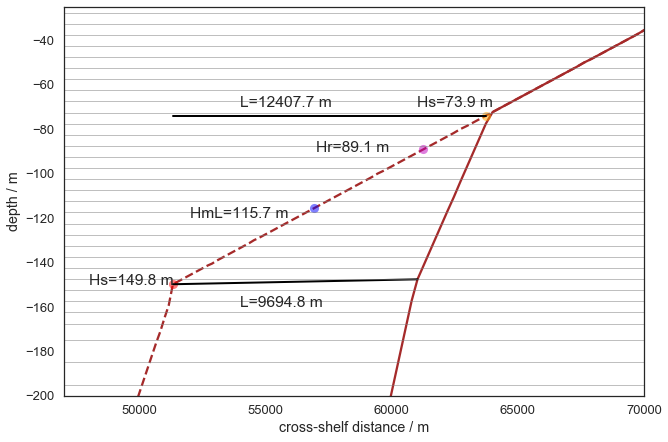

In [11]:
fig, ax = plt.subplots(1,1)

# plot canyon axis and shelf
ax.plot(Y,-depthLon2[:,300], color='brown', linestyle='--')
ax.plot(Y,-depthLon2[:,180], color='brown')

# Shelf break depthLon2
ax.plot(YLon2[225],-depthLon2[225,300],'ro', alpha=0.5)
print('shelf break depthLon2 is %1.1f m' %depthLon2[225,300])
ax.text(48000,-150,'Hs=%1.1f m' %(depthLon2[225,300]))

# Head depthLon2
ax.plot(YLon2[285],-depthLon2[285,300],'o', color='orange', alpha=0.5)
print('head depthLon2 is %1.1f m' %depthLon2[285,300])
ax.text(61000,-70,'Hs=%1.1f m' %(depthLon2[285,300]))

# rim depthLon2 at UwH
ax.plot(YLon2[275],-depthLon2[275,300],'mo', alpha=0.5)
print('rim depthLon2 at station UwH is %1.1f m' %depthLon2[275,300])
ax.text(57000,-90,'Hr=%1.1f m' %(depthLon2[275,300]))

# mid length depth
ax.plot(YLon2[255],-depthLon2[255,300],'bo', alpha=0.5)
print('rim depthLon2 at mid length is %1.1f m' %depthLon2[255,300])
ax.text(52000,-120,'HmL=%1.1f m' %(depthLon2[255,300]))

# L
plt.plot([YLon2[285],YLon2[225]],[-depthLon2[285,300],-depthLon2[285,300]], linewidth=2, color='k')
print('Big L is %1.1f m' %(Y[285]-Y[225]))
ax.text(54000,-70,'L=%1.1f m' %(Y[285]-Y[225]))

# Short length
plt.plot([YLon2[274],YLon2[225]],[-depthLon2[274,180],-depthLon2[225,300]], linewidth=2, color='k')
print('L is %1.1f m' %(YLon2[274]-YLon2[225]))
ax.text(54000,-160,'L=%1.1f m' %(YLon2[274]-YLon2[225]))

# depthLon2 levels
for zz in range(len(RC)):
    ax.axhline(RC[zz], color='0.5', linewidth=0.5)

ax.set_ylim(-200,-25)
ax.set_xlim(47000,70000)

slope2 = (-depthLon2[225,400]+depthLon2[269,400])/(YLon2[225]-YLon2[269])

ax.set_xlabel('cross-shelf distance / m')
ax.set_ylabel('depth / m')

print('slope = (%1.2f + %1.2f) / (%1.2f - %1.2f) = %1.2f' %(-depthLon2[225,400],depthLon2[269,400],
                                                            YLon2[225],YLon2[269], slope2) )

Width at rim depth at mid length is 21141.7 m
Width at sb depth at mid length is 11956.6 m
Width at sb depth at mouth is 26473.2 m
L is 12407.7 m


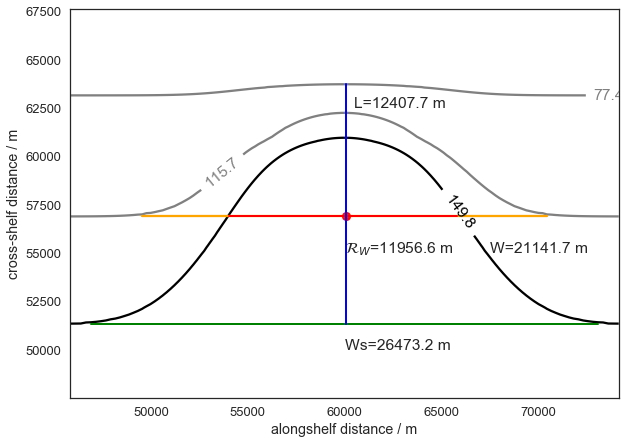

In [12]:
fig, ax = plt.subplots(1,1)
CS = ax.contour(XLon2[100:260],YLon2[200:300],depthLon2[200:300,100:260], levels=[depthLon2[285,180],depthLon2[255,300], 149.8], colors=['0.5','0.5','k'])
ax.clabel(CS, fmt='%1.1f')
ax.plot(XLon2[180],YLon2[255],'or')

ax.plot(XLon2[115:245],np.ones(len(XLon2[115:245]))*YLon2[255],'-', color='orange')
print('Width at rim depth at mid length is %1.1f m' %(-XLon2[115]+XLon2[245]))
ax.text(67500,55000,'W=%1.1f m' %(-XLon2[115]+XLon2[245]))

ax.plot(XLon2[138:221],np.ones(len(XLon2[138:221]))*YLon2[255],'-r', linewidth=2)
print('Width at sb depth at mid length is %1.1f m' %(-XLon2[138]+XLon2[221]))
ax.text(60000,55000,r'$\mathcal{R}_W$=%1.1f m' %(-XLon2[138]+XLon2[221]))

ax.plot(XLon2[104:256],np.ones(len(XLon2[104:256]))*YLon2[225],'-g', linewidth=2)
print('Width at sb depth at mouth is %1.1f m' %(-XLon2[104]+XLon2[256]))
ax.text(60000,50000,'Ws=%1.1f m' %(-XLon2[104]+XLon2[256]))

ax.plot(np.ones(len(YLon2[225:286]))*XLon2[180], YLon2[225:286],'-b', linewidth=2)
print('L is %1.1f m' %(YLon2[285]-YLon2[225]))
ax.text(60500,62500,'L=%1.1f m' %(YLon2[285]-YLon2[225]))

ax.set_xlabel('alongshelf distance / m')
ax.set_ylabel('cross-shelf distance / m')

ax.set_aspect(1)

### NARROW_CNY

shelf break depthNarr is 149.8 m
head depthNarr is 98.8 m
rim depthNarr at station UwH is 108.1 m
rim depthNarr at mid length is 126.7 m
Big L is 8332.6 m
slope = (-149.82 + 97.46) / (51333.64 - 59888.45) = 0.01


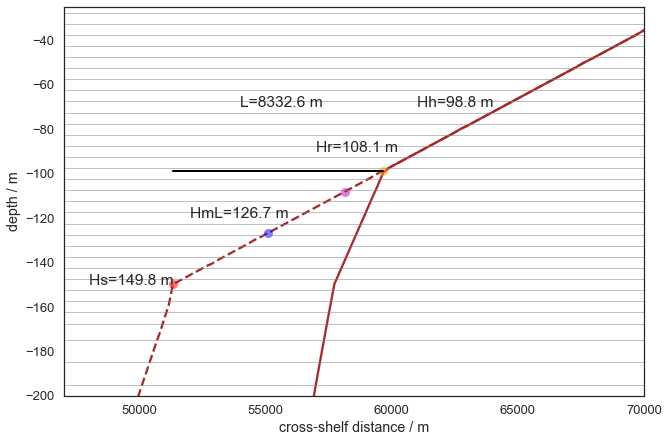

In [23]:
fig, ax = plt.subplots(1,1)

# plot canyon axis and shelf
ax.plot(YNarr,-depthNarr[:,300], color='brown', linestyle='--')
ax.plot(YNarr,-depthNarr[:,180], color='brown')

# Shelf break depthNarr
ax.plot(YNarr[225],-depthNarr[225,300],'ro', alpha=0.5)
print('shelf break depthNarr is %1.1f m' %depthNarr[225,300])
ax.text(48000,-150,'Hs=%1.1f m' %(depthNarr[225,300]))

# Head depthNarr
ax.plot(YNarr[268],-depthNarr[268,300],'o', color='orange', alpha=0.5)
print('head depthNarr is %1.1f m' %depthNarr[268,300])
ax.text(61000,-70,'Hh=%1.1f m' %(depthNarr[268,300]))

# rim depthNarr at UwH
ax.plot(YNarr[261],-depthNarr[261,300],'mo', alpha=0.5)
print('rim depthNarr at station UwH is %1.1f m' %depthNarr[261,300])
ax.text(57000,-90,'Hr=%1.1f m' %(depthNarr[261,300]))

# mid length depth
ax.plot(YNarr[246],-depthNarr[246,300],'bo', alpha=0.5)
print('rim depthNarr at mid length is %1.1f m' %depthNarr[246,300])
ax.text(52000,-120,'HmL=%1.1f m' %(depthNarr[246,300]))

# L
plt.plot([YNarr[268],YNarr[225]],[-depthNarr[268,300],-depthNarr[268,300]], linewidth=2, color='k')
print('Big L is %1.1f m' %(Y[268]-Y[225]))
ax.text(54000,-70,'L=%1.1f m' %(Y[268]-Y[225]))

# depthNarr levels
for zz in range(len(RC)):
    ax.axhline(RC[zz], color='0.5', linewidth=0.5)

ax.set_ylim(-200,-25)
ax.set_xlim(47000,70000)

slope2 = (-depthNarr[225,400]+depthNarr[269,400])/(YNarr[225]-YNarr[269])

ax.set_xlabel('cross-shelf distance / m')
ax.set_ylabel('depth / m')

print('slope = (%1.2f + %1.2f) / (%1.2f - %1.2f) = %1.2f' %(-depthNarr[225,400],depthNarr[269,400],
                                                            YNarr[225],YNarr[269], slope2) )

Width at rim depth at mid length is 21141.7 m
Width at sb depth at mid length is 12310.3 m
Width at sb depth at mouth is 23940.2 m
L is 8332.6 m


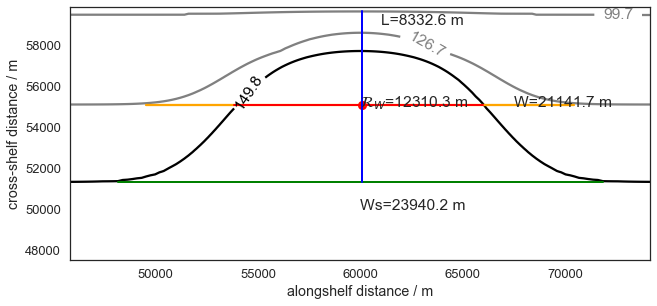

In [37]:
fig, ax = plt.subplots(1,1)
CS = ax.contour(XNarr[100:260],YNarr[200:270],depthNarr[200:270,100:260], levels=[depthNarr[268,180],depthNarr[246,300], 149.8], colors=['0.5','0.5','k'])
ax.clabel(CS, fmt='%1.1f')
ax.plot(XNarr[180],YNarr[246],'or')

ax.plot(XNarr[115:245],np.ones(len(XNarr[115:245]))*YNarr[246],'-', color='orange')
print('Width at rim depth at mid length is %1.1f m' %(-XNarr[115]+XNarr[245]))
ax.text(67500,55000,'W=%1.1f m' %(-XNarr[115]+XNarr[245]))

ax.plot(XNarr[137:222],np.ones(len(XNarr[137:222]))*YNarr[246],'-r', linewidth=2)
print('Width at sb depth at mid length is %1.1f m' %(-XNarr[137]+XNarr[222]))
ax.text(60000,55000,r'$\mathcal{R}_W$=%1.1f m' %(-XNarr[137]+XNarr[222]))

ax.plot(XNarr[109:251],np.ones(len(XNarr[109:251]))*YNarr[225],'-g', linewidth=2)
print('Width at sb depth at mouth is %1.1f m' %(-XNarr[109]+XNarr[251]))
ax.text(60000,50000,'Ws=%1.1f m' %(-XNarr[109]+XNarr[251]))

ax.plot(np.ones(len(YNarr[225:269]))*XNarr[180], YNarr[225:269],'-b', linewidth=2)
print('L is %1.1f m' %(YNarr[268]-YNarr[225]))
ax.text(61000,59000,'L=%1.1f m' %(YNarr[268]-YNarr[225]))

ax.set_xlabel('alongshelf distance / m')
ax.set_ylabel('cross-shelf distance / m')

ax.set_aspect(1)

### Widths Comparison

In [38]:
CanyonGridBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'
CanyonGridBarOut = Dataset(CanyonGridBar)

CanyonStateBar='/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/stateGlob.nc'
CanyonStateBarOut = Dataset(CanyonStateBar)



In [39]:
sb_ind = 29

depthBar = CanyonGridBarOut.variables['Depth'][:]
YBar = CanyonGridBarOut.variables['Y'][:]
XBar = CanyonGridBarOut.variables['X'][:]
RCBar = CanyonGridBarOut.variables['RC'][:]
hFacCBar = CanyonGridBarOut.variables['HFacC'][:]

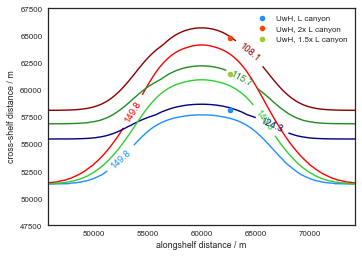

In [94]:
sns.set_context('paper')
fig, ax = plt.subplots(1,1, figsize=(6,4))

#ax.contour(XNarr[100:260],YNarr[200:300],depthNarr[200:300,100:260], levels=[124.3, 149.8], colors=['purple','orchid'])

c1 = ax.contour(X[100:260],Y[200:300],depth[200:300,100:260], levels=[108.1, 149.8], colors=['darkred','red'])
ax.clabel(c1, fmt='%1.1f')

c2 = ax.contour(XBar[100:260],YBar[200:300],depthBar[200:300,100:260], levels=[124.3, 149.8], colors=['navy','dodgerblue'])
ax.clabel(c2, fmt='%1.1f')

c3 = ax.contour(XLon2[100:260],YLon2[200:300],depthLon2[200:300,100:260], levels=[115.7, 149.8], colors=['forestgreen','limegreen'])
ax.clabel(c3, fmt='%1.1f')

#ax.plot(X[200],Y[261],'o', color='orchid', label='UwH, Narrow canyon', markersize='15')
ax.plot(XBar[200],YBar[261],'o', color='dodgerblue', label='UwH, L canyon')
ax.plot(XLon2[200],YLon2[289],'o', color='orangered', label='UwH, 2x L canyon')
ax.plot(X[200],Y[276],'o', color='yellowgreen', label='UwH, 1.5x L canyon')

ax.set_xlabel('alongshelf distance / m')
ax.set_ylabel('cross-shelf distance / m')

ax.legend(loc=0)

ax.set_aspect(1)
plt.savefig('all_lengths.eps', format='eps',bbox_inches='tight' )

Dots are located at station UwH for each bathymetry. Darker lines correspond to the rim depth isobath at station UwHand lighter lines correspond to the shelf-break depth isobath.

### Radius of curvature

I can stack the shelf break contours for 1.5x L (green) and 2x L (red) canyons to of Barkley-like canyon (blue) if I move them to the right by 1 km and 2 km, respectivey:

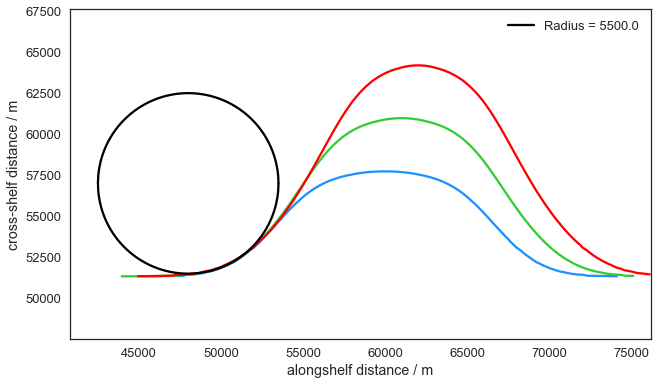

In [85]:
fig, ax = plt.subplots(1,1)

ax.contour(XBar[100:260],YBar[200:300],depthBar[200:300,100:260], levels=[149.8], colors=['dodgerblue'])

ax.contour(XLon2[90:260]+1000,YLon2[200:300],depthLon2[200:300,90:260], levels=[149.8], colors=['limegreen'])

ax.contour(X[90:260]+2000,Y[200:300],depth[200:300,90:260], levels=[149.8], colors=['red'])

ax.set_xlabel('alongshelf distance / m')
ax.set_ylabel('cross-shelf distance / m')

R = 5500
xx = np.linspace(-R, R, 1000)
circ = np.sqrt(R**2 - xx**2) 

ax.plot(xx+48000, -circ+57000, 'k')
ax.plot(xx+48000, circ+57000, 'k', label = 'Radius = %1.1f' %R)
ax.legend(loc=0)
ax.set_aspect(1)

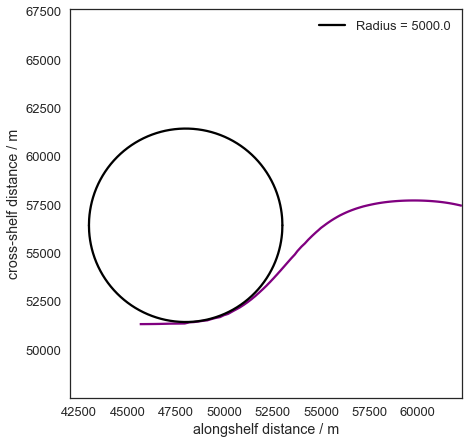

In [67]:
fig, ax = plt.subplots(1,1)

ax.contour(XNarr[100:200]-200,YNarr[200:300],depthNarr[200:300,100:200], levels=[149.8], colors=['purple'])


ax.set_xlabel('alongshelf distance / m')
ax.set_ylabel('cross-shelf distance / m')

R = 5000
xx = np.linspace(-R, R, 1000)
circ = np.sqrt(R**2 - xx**2) 

ax.plot(xx+48000, -circ+56450, 'k')
ax.plot(xx+48000, circ+56450, 'k', label = 'Radius = %1.1f' %R)
ax.legend(loc=0)
ax.set_aspect(1)

In [19]:
grid_file = '/data/kramosmu/results/TracerExperiments/CNTDIFF/run38/gridGlob.nc'

with Dataset(grid_file, 'r') as nbl:
    Z = nbl.variables['RC'][:]
    X = nbl.variables['X'][:]
    Y = nbl.variables['Y'][:]
    hFacC = nbl.variables['HFacC'][:]
    rA = nbl.variables['rA'][:]
    Depth = nbl.variables['Depth'][:]

hfac = np.ma.masked_values(hFacC, 0)
maskC = np.ma.getmask(hfac)

In [20]:
X_small = X[90:270]
Y_small = Y[200:300]
Depth_small = Depth[200:300, 90:270]
sb_ind = np.argmin(hFacC[29, 200:300, 90:270], axis = 0)


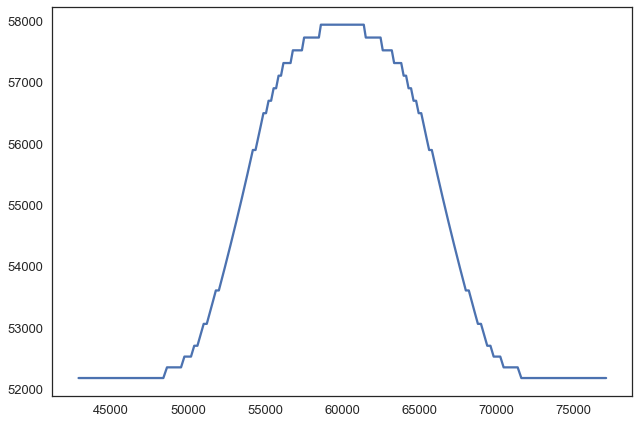

In [21]:
sb_ind
plt.plot(X_small, Y_small[sb_ind])


### Check that all shelf slopes are equal

Head indices are 
 Barkley: 20, 
 1.5x long: 14 
 2x long: 10


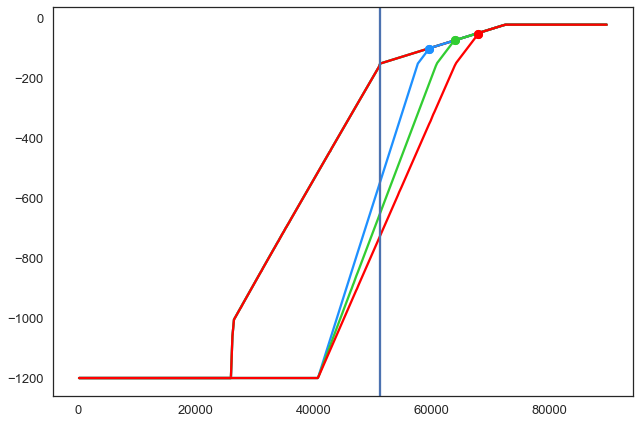

In [22]:
fig, ax = plt.subplots(1,1)

ax.plot(YBar[:],-depthBar[:,300],  color='dodgerblue')
ax.plot(YLon2[:],-depthLon2[:,300],  color='limegreen')
ax.plot(Y[:],-depth[:,300],  color='red')

ax.plot(YBar[:],-depthBar[:,180],  color='dodgerblue')
ax.plot(YLon2[:],-depthLon2[:,180],  color='limegreen')
ax.plot(Y[:],-depth[:,180],  color='red')

ax.plot(YBar[268],-depthBar[268,180], 'o', color='dodgerblue')
ax.plot(YLon2[286],-depthLon2[286,180],'o',  color='limegreen')
ax.plot(Y[300],-depth[300,180],'o',  color='red')

ind1=20
ind2=14
ind3=10
ax.plot(YBar[268],Z[ind1], 'o', color='dodgerblue')
ax.plot(YLon2[286],Z[ind2],'o',  color='limegreen')
ax.plot(Y[300],Z[ind3],'o',  color='red')

ax.axvline(Y[225])
print('Head indices are \n Barkley: %d, \n 1.5x long: %d \n 2x long: %d' % (ind1,ind2,ind3) )